In [1]:
import numpy as np
import qiskit as q
from qiskit.providers.basic_provider import BasicProvider
import qiskit.quantum_info as qq
import qiskit.visualization as qv

In [2]:
def simulate(qc, num_shots=1024):
    backend = BasicProvider().get_backend('basic_simulator')
    sim = backend.run(q.transpile(qc, backend), shots=num_shots)
    return sim.result().get_counts()

|0> , |1> , |+> , |-> , |+i> , |-i>


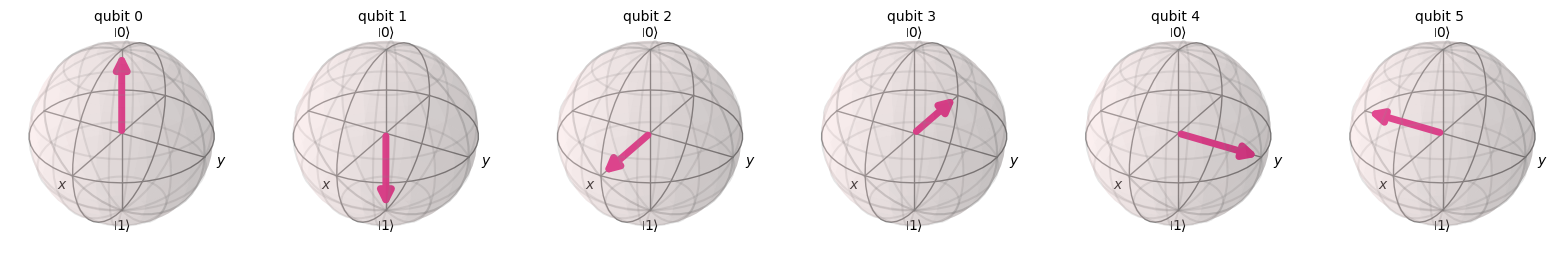

In [3]:
example_qc = q.QuantumCircuit(6)

print("|0> , |1> , |+> , |-> , |+i> , |-i>")

# |0> is the initialised state

# |1>
example_qc.x(1)

# |+>
example_qc.h(2)

# |->
example_qc.x(3)
example_qc.h(3)

# |+i>
example_qc.rx(-np.pi/2, 4)

# |-i>
example_qc.rx(np.pi/2, 5)

qv.plot_bloch_multivector(example_qc)

Hadamard:
 eigenvalues: 1.0 and -0.9999999999999999 
 eigenvectors: [ 0.92387953 -0.38268343] and [0.38268343 0.92387953]


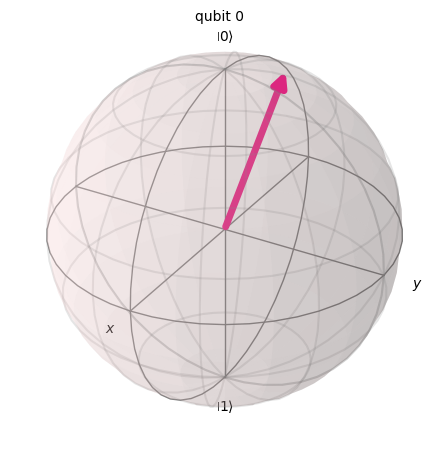

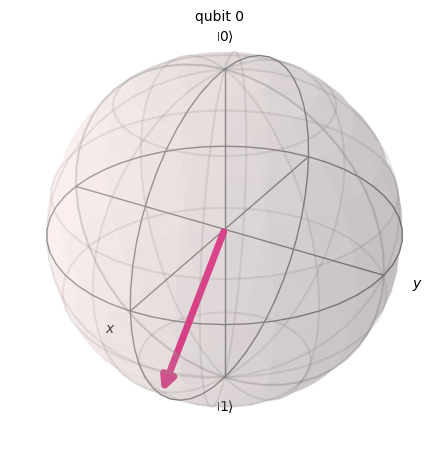

In [4]:
hadamard = 1/np.sqrt(2) * np.array([[1,1],[1,-1]])
(eigVal1H, eigVal2H), (eigVec1H, eigVec2H) = np.linalg.eig(hadamard)

print(f"Hadamard:\n eigenvalues: {eigVal1H} and {eigVal2H} \n eigenvectors: {eigVec1H} and {eigVec2H}")

hadamard_eig1 = qq.Statevector(np.array(eigVec1H))
hadamard_eig1 /= np.linalg.norm(hadamard_eig1)
display(qv.plot_bloch_multivector(hadamard_eig1))

hadamard_eig2 = qq.Statevector(np.array(eigVec2H))
hadamard_eig2 /= np.linalg.norm(hadamard_eig2)
display(qv.plot_bloch_multivector(hadamard_eig2))

Eigenvector before hadamard


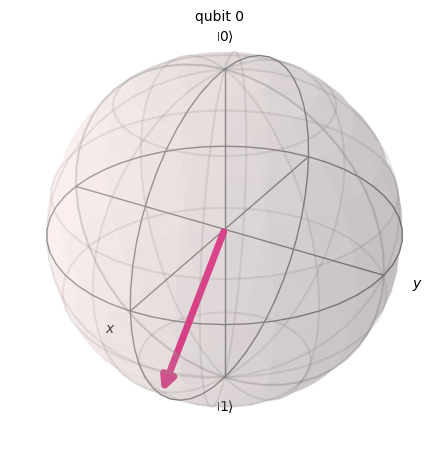

Eigenvector after first hadamard


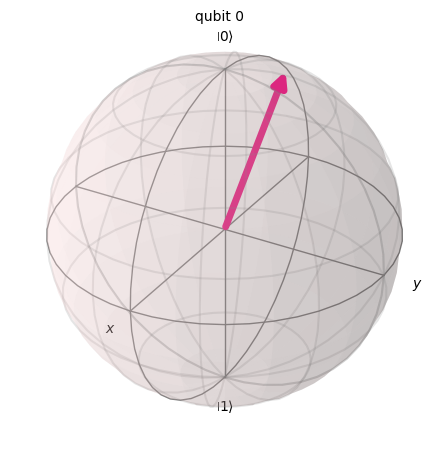

Eigenvector after second hadamard


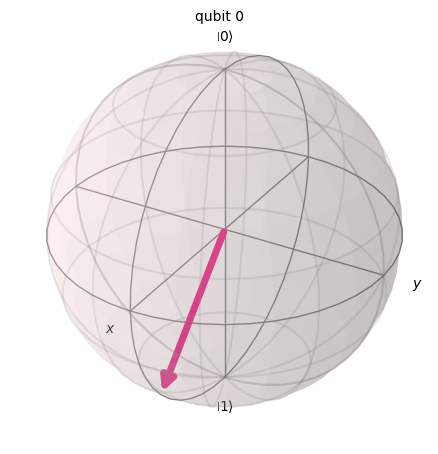

In [5]:
hadamard_qc = q.QuantumCircuit(1)
# setup
hadamard_qc.ry(3/4*np.pi,0)
print("Eigenvector before hadamard")
display(qv.plot_bloch_multivector(hadamard_qc))


# apply first hadamard
hadamard_qc.h(0)
print("Eigenvector after first hadamard")
display(qv.plot_bloch_multivector(hadamard_qc))


# apply second hadamard
hadamard_qc.h(0)
print("Eigenvector after second hadamard")
display(qv.plot_bloch_multivector(hadamard_qc))

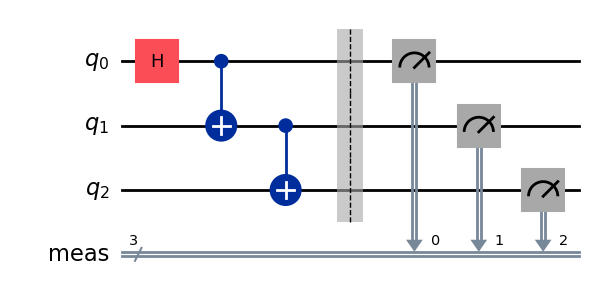

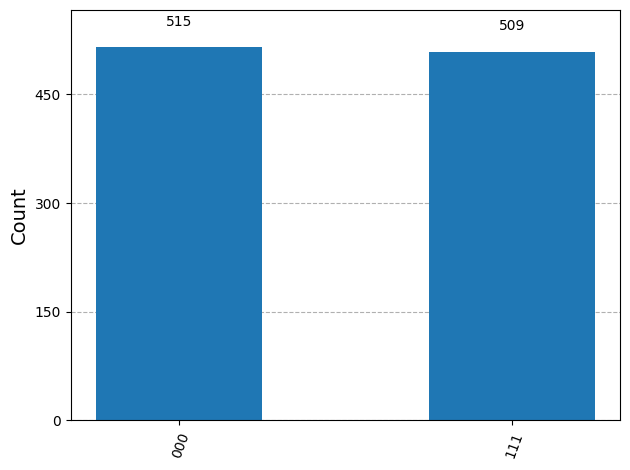

In [6]:
qc = q.QuantumCircuit(3)

qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.measure_all()
display(qc.draw("mpl"))
display(qv.plot_histogram(simulate(qc)))